In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2 as cv
import os, shutil
from pathlib import Path

from skimage import feature as ft
import math
import re

In [11]:
# 获得该文件夹下所有jpg图片路径
f=open('./flowers/train.txt', encoding="utf-8")
files = f.readlines()  # 直接将文件中按行读到list里，效果与方法2一样
f.close()

In [3]:
model = tf.keras.applications.MobileNetV2(include_top=False,
weights="imagenet", input_shape=(224, 224, 3))

In [12]:
i = 0
train_label = []
for _ in files:
    elements = re.split(r'[-\s,;!?]+', _)
    files[i] = './flowers/'+elements[0]
    train_label.extend(elements[1])
    i += 1
i = 0

In [13]:
# opencv读取图像 并resize为（224，224）
images = [cv.resize(cv.imread(str(file)), (224, 224)) for file in files]
paths = [file for file in files]
# 图像数组转换为float32类型并reshape  然后做归一化
images = np.array(np.float32(images).reshape(len(images), -1) / 255)

In [30]:
print(len(images))
print(len(images[0]))

3024
150528


In [17]:
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

In [ ]:
print(len(pred_images))
print(len(images[0]))

In [19]:
pred_images[0:3]

array([[0.       , 4.4128947, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 2.3157682, 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [44]:
f=open('./flowers/test.txt', encoding="utf-8")
test_data = f.readlines()  # 直接将文件中按行读到list里，效果与方法2一样
f.close()

In [45]:
i = 0
test_label = []
for _ in test_data:
    elements = re.split(r'[-\s,;!?]+', _)
    test_data[i] = './flowers/'+ elements[0]
    test_label.extend(elements[1])
    i += 1
i = 0

In [46]:
# opencv读取图像 并resize为（224，224）
images_test = [cv.resize(cv.imread(str(file)), (224, 224)) for file in test_data]
#paths = [file for file in files]
# 图像数组转换为float32类型并reshape  然后做归一化
images_test = np.array(np.float32(images_test).reshape(len(images_test), -1) / 255)

In [47]:
predictions_test = model.predict(images_test.reshape(-1, 224, 224, 3))
pred_test_images = predictions_test.reshape(images_test.shape[0], -1)

In [49]:
y = pred_test_images.tolist()

ValueError: X has 150528 features, but KNeighborsClassifier is expecting 62720 features as input.

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 1.27105, 0.     , ..., 0.     , 0.     , 0.     ]],
      dtype=float32)

In [55]:
knn = KNeighborsClassifier(n_neighbors=4)    #实例化KNN模型
knn.fit(pred_images, train_label)      #放入训练数据进行训练

KNeighborsClassifier(n_neighbors=4)

In [56]:
score2 = knn.score(y, test_label)
print(score2)

0.6983758700696056


Text(0, 0.5, 'score')

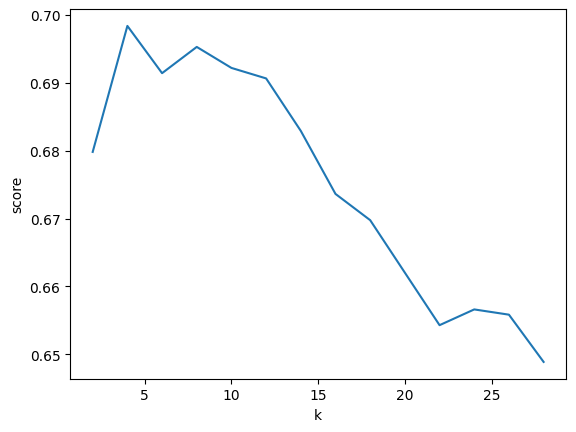

In [52]:
import matplotlib.pyplot as plt
ks = np.arange(2,30,2)
scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(pred_images,train_label)
    score = knn.score(y,test_label)
    scores.append(score)
scores = np.array(scores)
plt.plot(ks,scores)
plt.xlabel('k')
plt.ylabel('score')

In [54]:
len(images_test[0])

150528

Text(0, 0.5, 'Accuracy')

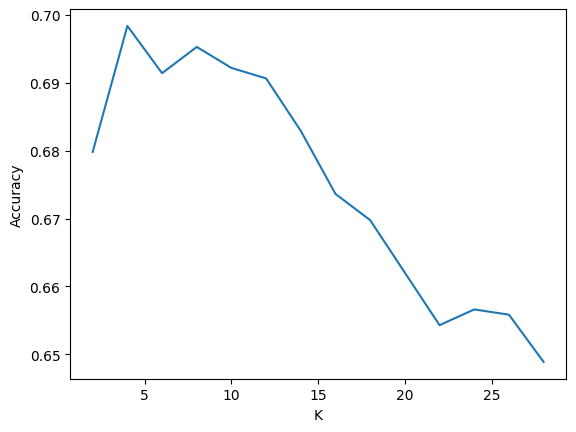

In [57]:
plt.plot(ks,scores)
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
model.get_layer()